Methods to Handle Missing Values:
1. Imputation
2. Dropping

Importing the Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#loading the dataset to a Pandas dataframe
dataset = pd.read_csv('/content/Placement_Dataset.csv')

In [33]:
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000


In [4]:
dataset.shape


(215, 15)

In [28]:
dataset.isnull().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


# 1. Central Tendencies
1. Mean - avg of all the values
2. Median - middle values in non-decreasing set
3. Mode - most frequency

/tmp/ipython-input-12-1739026999.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['salary'], color='r')


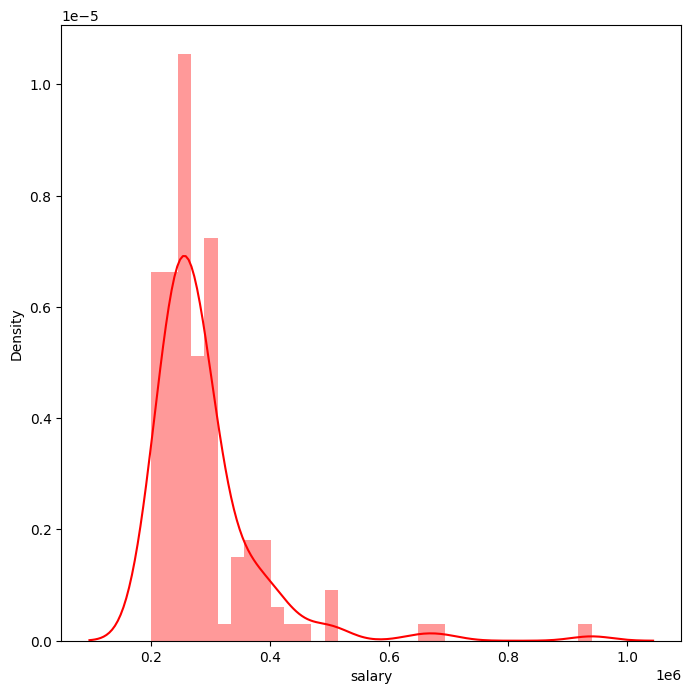

In [12]:
#Analyse the distribution of data in the salary
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(dataset['salary'], color='r')
plt.show()

Replace the missing values with Median value

In [46]:
median_imputation = dataset['salary'].fillna(dataset['salary'].median(), inplace=True)
print(median_imputation)

None


/tmp/ipython-input-46-164522840.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  median_imputation = dataset['salary'].fillna(dataset['salary'].median(), inplace=True)


In [18]:
dataset.isnull().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


In [45]:
#filling missing values with mean value:
#mean_imputation = dataset['salary'].fillna(dataset['salary'].mean(), inplace=True)
#print(mean_imputation)

In [34]:
#filling missing values with mean value:
#dataset['salary'].fillna(dataset['salary'].mode(), inplace=True)

#2. Forward and Backward Fill

In [47]:
# Forward and Backward Fill
forward_fill = dataset['salary'].fillna(method='ffill')
backward_fill = dataset['salary'].fillna(method='bfill')

print("\nForward Fill:")
print(forward_fill)

print("\nBackward Fill:")
print(backward_fill)


Forward Fill:
0      270000.000000
1      200000.000000
2      250000.000000
3      288655.405405
4      425000.000000
           ...      
210    400000.000000
211    275000.000000
212    295000.000000
213    204000.000000
214    288655.405405
Name: salary, Length: 215, dtype: float64

Backward Fill:
0      270000.000000
1      200000.000000
2      250000.000000
3      288655.405405
4      425000.000000
           ...      
210    400000.000000
211    275000.000000
212    295000.000000
213    204000.000000
214    288655.405405
Name: salary, Length: 215, dtype: float64


/tmp/ipython-input-47-2606251229.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forward_fill = dataset['salary'].fillna(method='ffill')
/tmp/ipython-input-47-2606251229.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  backward_fill = dataset['salary'].fillna(method='bfill')


#3. Interpolation Techniques
More sophisticated than mean/median imputation
1. Linear Interpolation
2. Quadratic Interpolation

In [48]:
#  Interpolation Techniques
linear_interpolation = dataset['salary'].interpolate(method='linear')
quadratic_interpolation = dataset['salary'].interpolate(method='quadratic')

print("\nLinear Interpolation:")
print(linear_interpolation)

print("\nQuadratic Interpolation:")
print(quadratic_interpolation)


Linear Interpolation:
0      270000.000000
1      200000.000000
2      250000.000000
3      288655.405405
4      425000.000000
           ...      
210    400000.000000
211    275000.000000
212    295000.000000
213    204000.000000
214    288655.405405
Name: salary, Length: 215, dtype: float64

Quadratic Interpolation:
0      270000.000000
1      200000.000000
2      250000.000000
3      288655.405405
4      425000.000000
           ...      
210    400000.000000
211    275000.000000
212    295000.000000
213    204000.000000
214    288655.405405
Name: salary, Length: 215, dtype: float64


#Dropping Method

In [40]:
salary_dataset = pd.read_csv('/content/Placement_Dataset.csv')

In [41]:
salary_dataset.shape

(215, 15)

In [42]:
salary_dataset.isnull().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


In [43]:
#drop the missing values
salary_dataset = salary_dataset.dropna(how='any')

In [44]:
salary_dataset.shape

(148, 15)